In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [359]:
#PRE-PROCESSING OF DATA
df = pd.read_csv('iris.csv', sep = ',')
data = df.rename(columns={"sepal.length":"Sepal_Length", "sepal.width": "Sepal_Width","petal.length": "Petal_Length","petal.width": "Petal_Width","variety":"Species"})
encode = LabelEncoder()
data.Species = encode.fit_transform(data.Species)
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


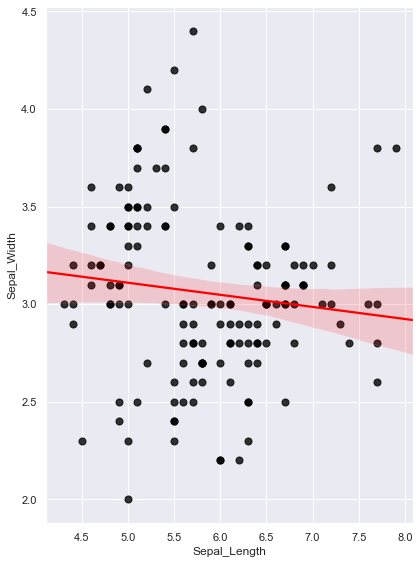

In [360]:
#Exploratory Data Analysis

#PLOT-1
sns.regplot(x=data['Sepal_Length'], y=data['Sepal_Width'],scatter_kws={"color":"black","alpha":0.8,"s":50},line_kws={"color": "red"})
sns.set(style="white",color_codes=True)
plt.tight_layout()

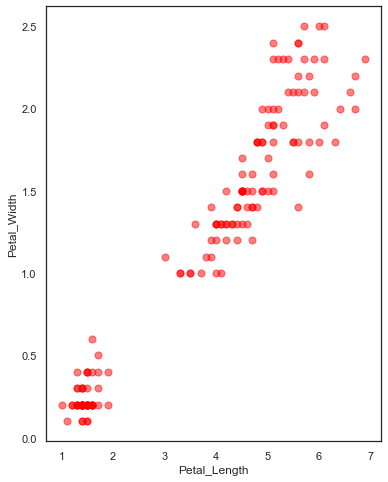

In [361]:
#PLOT-2
sns.regplot( x=data["Petal_Length"], y=data["Petal_Width"],scatter_kws={"color":"red","alpha":0.5,"s":50},fit_reg=False)
sns.set(style="white",color_codes=True)

C:\Users\LAKSHAY\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


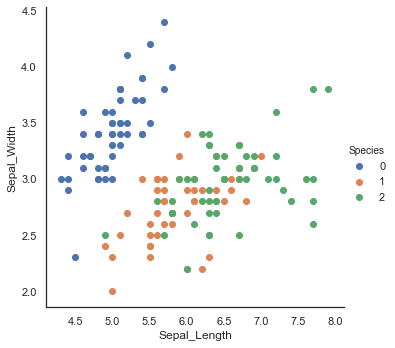

In [362]:
#PLOT-3
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "Sepal_Length", "Sepal_Width") \
   .add_legend()
sns.set(style="white",color_codes=True)

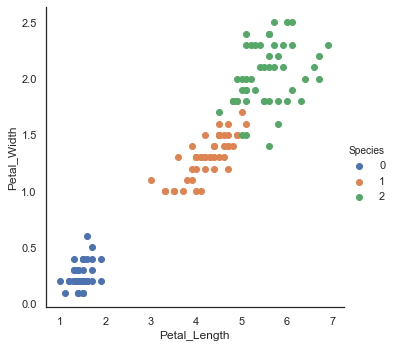

In [363]:
#PLOT-4
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "Petal_Length", "Petal_Width") \
   .add_legend()
sns.set(style="white",color_codes=True)

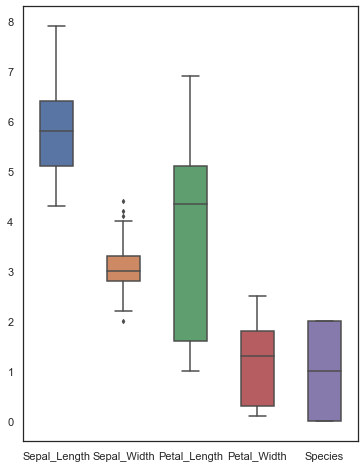

In [364]:
import seaborn as sns
sns.boxplot(data=data,width=0.5,fliersize=3)
sns.set(rc={'figure.figsize':(6,8)})

In [365]:
#Prediction
#---------------#
train,test = train_test_split(data,test_size=0.2,random_state=0)
print('shape of training data : ',train.shape)
print('shape of testing data',test.shape)


shape of training data :  (120, 5)
shape of testing data (30, 5)


In [366]:
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

In [367]:
#Prediction using Knn Classifier model
knn =  KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)
pred = knn.predict(test_x)
print('\n\nAccuracy Score on test data(KNN)) : \n\n')
print(accuracy_score(test_y,pred))



Accuracy Score on test data(KNN)) : 


0.9666666666666667


In [368]:
#Prediction using Logistic Regression Model
model = LogisticRegression()

model.fit(train_x,train_y)
predict = model.predict(test_x)

print('\n\nAccuracy Score on test data(Logistic Regression) : \n\n')
print(accuracy_score(test_y,predict))



Accuracy Score on test data(Logistic Regression) : 


0.9666666666666667


C:\Users\LAKSHAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LAKSHAY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
